# Titanic_Dataset

Importing pandas, numpy and matplotlib, random

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Reading CSV file

In [129]:
df = pd.read_csv('data.csv', usecols=['Survived', 'Pclass', 'Sex', 'Age'])

Changing Age column with median value

In [130]:
df['Age'] = df['Age'].fillna(df['Age'].median())

Create number of males/females and death rate

In [131]:
Males = len(df[df.Sex == 'male'])
Females = len(df[df.Sex == 'female'])
Dead_males = len(df[(df.Sex == 'male') & (df.Survived == 0)])
Dead_females = len(df[(df.Sex == 'female') & (df.Survived == 0)])

Create DataFrame by Sex

In [132]:
index = ['Bar']
d = {'Males': [Males], 'Females': [Females], 'Dead_males': [Dead_males], 'Dead_females': [Dead_females]}
ds = pd.DataFrame(data=d, index=index)

Create a plot

<AxesSubplot:>

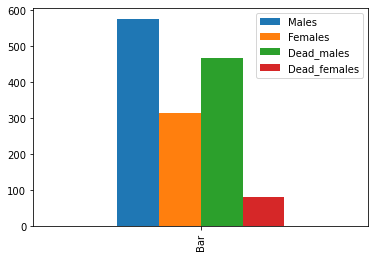

In [133]:
ds.plot.bar()

Divide by age and death rate

In [134]:
Сhildren_Survived = len(df[(df.Age < 20) & (df.Survived == 1)])
Сhildren_Death = len(df[(df.Age < 20) & (df.Survived == 0)])

Young_Survived = len(df[(df.Age >= 20) & (df.Age < 40) & (df.Survived == 1)])
Young_Death = len(df[(df.Age >= 20) & (df.Age < 40) & (df.Survived == 0)])

Adult_Survived = len(df[(df.Age >= 40) & (df.Age < 60) & (df.Survived == 1)])
Adult_Death = len(df[(df.Age >= 40) & (df.Age < 60) & (df.Survived == 0)])

Retired_Survived = len(df[(df.Age >= 60) & (df.Survived == 1)])
Retired_Death = len(df[(df.Age >= 60) & (df.Survived == 0)])

Create DataFrame by age

In [135]:
index = ['0-20', '20-40', '40-60', '60+']
Survived = [Сhildren_Survived, Young_Survived, Adult_Survived, Retired_Survived]
Died = [Сhildren_Death, Young_Death, Adult_Death, Retired_Death]
ds = pd.DataFrame({'Survived': Survived, 'Died': Died}, index=index)

Create a plot bar by age

<AxesSubplot:>

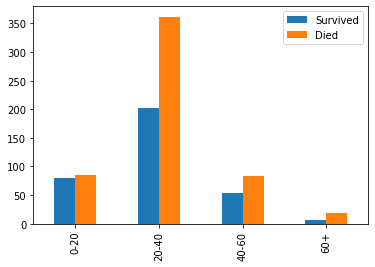

In [136]:
ds.plot.bar()

Divide by cabin class

In [137]:
First_class_Survived = len(df[(df.Pclass == 1) & (df.Survived == 1)])
First_class_Death = len(df[(df.Pclass == 1) & (df.Survived == 0)])

Second_class_Survived = len(df[(df.Pclass == 2) & (df.Survived == 1)])
Second_class_Death = len(df[(df.Pclass == 2) & (df.Survived == 0)])

Third_class_Survived = len(df[(df.Pclass == 3) & (df.Survived == 1)])
Third_class_Death = len(df[(df.Pclass == 3) & (df.Survived == 0)])

Create DataFrame

In [138]:
index = ['1st class', '2nd class', '3rd class']
Survived = [First_class_Survived, Second_class_Survived, Third_class_Survived]
Died = [First_class_Death, Second_class_Death, Third_class_Death]
ds = pd.DataFrame({'Survived': Survived, 'Died': Died}, index=index)

Create a plot bar by cabin class

<AxesSubplot:>

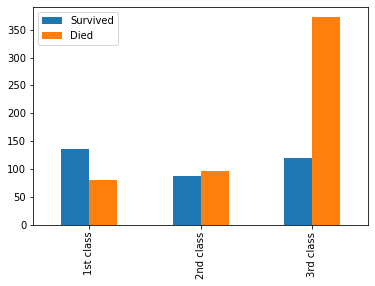

In [139]:
ds.plot.bar()

## Pivot table 

Pivot table by class (Survived)

In [140]:
table = pd.pivot_table(df, values='Survived', index=['Sex'], columns=['Pclass'], aggfunc=np.sum)
table

Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


Pivot table by class (death rate)

In [141]:
ds = df
ds = ds.drop(ds[ds.Survived == 1].index)
ds = ds.replace(0, 1)

table = pd.pivot_table(ds, values='Survived', index=['Sex'], columns=['Pclass'], aggfunc=np.sum)
table

Pclass,1,2,3
Sex,,,
female,3,6,72
male,77,91,300


# Numpy array

Create random numbers list

In [142]:
random_arr = []
for i in range (1000):
    random_arr.append(random.randrange(10))

Create numpy array

In [143]:
numpy_array = np.array(random_arr)
len(numpy_array)

1000

Square every element in array and compare the speed of calculations (In 

In [146]:
for i in range (len(random_arr)):
    print(random_arr[i])

4
8
5
0
4
7
9
4
0
0
0
8
3
4
0
2
5
6
8
7
7
0
2
6
4
7
6
9
2
3
5
2
3
9
9
9
1
1
2
8
3
3
0
9
8
3
5
9
8
5
4
9
6
3
1
1
3
4
5
6
4
1
9
2
8
9
6
5
3
7
0
1
9
1
3
5
5
1
7
6
3
3
3
3
7
8
8
6
6
6
4
4
6
1
3
5
1
6
9
3
0
1
6
1
3
0
6
8
6
7
4
5
2
4
6
7
5
5
7
6
5
1
6
8
9
1
6
3
2
9
0
2
0
3
9
7
3
9
6
0
8
5
8
6
9
6
4
8
7
4
3
6
0
5
8
6
5
7
3
0
6
7
2
4
4
5
7
7
3
3
3
1
5
4
1
0
3
2
3
1
6
7
8
5
9
5
2
1
6
8
4
0
3
8
5
5
6
7
8
0
3
1
5
0
7
3
0
7
4
9
5
0
9
2
2
6
3
9
9
5
4
5
1
0
6
8
7
8
2
3
0
7
0
6
1
7
1
5
7
6
3
0
5
5
7
2
7
1
7
3
4
6
9
6
4
1
8
8
4
0
7
4
4
8
1
7
8
3
2
9
9
7
1
9
2
7
2
8
6
1
1
0
1
6
8
2
1
1
9
7
7
1
7
8
5
5
9
3
8
8
1
6
7
8
5
6
3
5
5
2
7
4
6
7
1
7
4
2
1
1
4
8
6
7
4
0
7
7
2
6
7
4
6
9
6
2
6
5
1
4
7
7
1
3
8
8
1
3
9
1
8
4
4
2
8
5
6
7
4
7
9
1
7
6
3
6
5
9
5
4
4
1
0
6
7
2
0
7
1
9
1
8
8
9
9
5
1
4
1
8
1
7
6
2
4
8
9
7
2
2
8
1
6
8
0
1
9
9
5
7
3
2
6
4
7
9
3
4
5
0
1
2
4
5
3
7
3
3
9
1
2
9
6
0
6
6
6
9
3
2
9
3
7
6
1
4
8
8
9
8
5
4
5
8
2
8
4
0
8
5
0
0
6
5
9
6
8
0
7
3
2
6
1
4
8
3
5
2
4
9
4
7
4
7
6
8
7
4
8
2
0
6
1
7
5
6
5
8
5
6
